In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [2]:
df = pd.read_csv("1632560262896716.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df["Gender"].replace({"Male" : 0 , "Female" : 1} , inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### EDA

In [7]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [8]:
df.corr().style.background_gradient(cmap="coolwarm")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


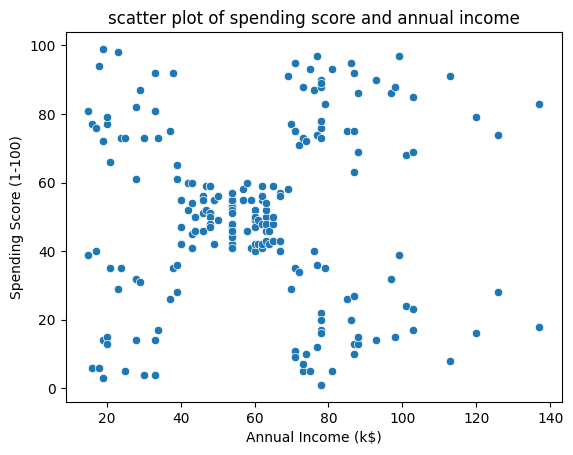

In [9]:
sns.scatterplot(data=df , x="Annual Income (k$)" , y="Spending Score (1-100)")
plt.title("scatter plot of spending score and annual income")
plt.show()

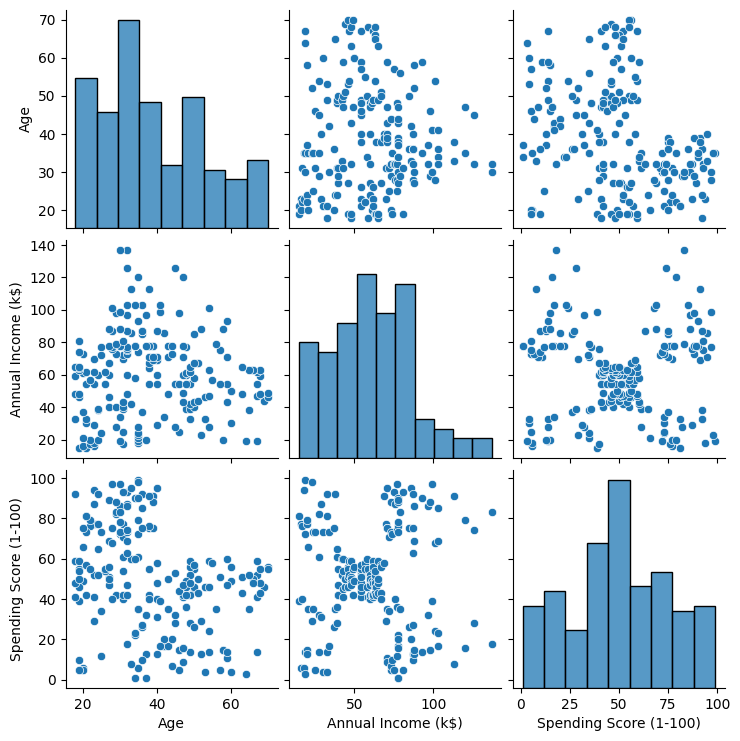

In [10]:
sns.pairplot(data=df , vars=["Age" , "Annual Income (k$)" , "Spending Score (1-100)"])

### K-Means

In [11]:
from sklearn.preprocessing import normalize
data = np.asarray(df[["Annual Income (k$)" , "Spending Score (1-100)"]])
data_norm = normalize(data)
data_norm

array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.93632918, 0.35112344],
       [0.20344646, 0.97908607],
       [0.39114064, 0.92033092],
       [0.21828984, 0.97588398],
       [0.9486833 , 0.31622777],
       [0.18807227, 0.98215519],
       [0.98776297, 0.15596257],
       [0.25515426, 0.96690036],
       [0.80505584, 0.59319904],
       [0.18847945, 0.98207713],
       [0.8       , 0.6       ],
       [0.25139836, 0.9678837 ],
       [0.83844362, 0.54498835],
       [0.24542187, 0.96941637],
       [0.51449576, 0.85749293],
       [0.30320366, 0.95292578],
       [0.62139471, 0.78349768],
       [0.22848559, 0.97354729],
       [0.56552836, 0.82472885],
       [0.31232107, 0.9499766 ],
       [0.98058068, 0.19611614],
       [0.32399297, 0.94605949],
       [0.89442719, 0.4472136 ],
       [0.32314385, 0.94634986],
       [0.65850461, 0.75257669],
       [0.41716766, 0.90882955],
       [0.68315713, 0.73027141],
       [0.31622777, 0.9486833 ],
       [0.

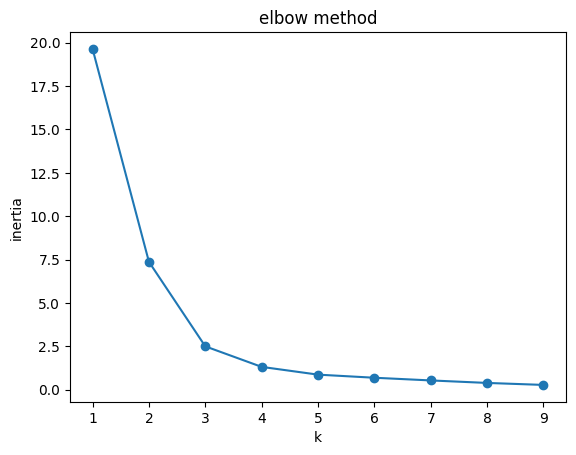

In [12]:
from sklearn.cluster import KMeans
sse = []
k_list = list(range(1,10))

for k in k_list:
    kmeans = KMeans(n_clusters=k , n_init="auto")
    kmeans.fit(data_norm)
    sse.append(kmeans.inertia_)

plt.plot(k_list , sse , "-o")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("elbow method")
plt.show()

In [13]:
kmeans = KMeans(5 , n_init="auto")
kmeans.fit(data)

KMeans(n_clusters=5, n_init='auto')

In [14]:
yhat = kmeans.predict(data)
yhat

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
center = kmeans.cluster_centers_
center

array([[87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

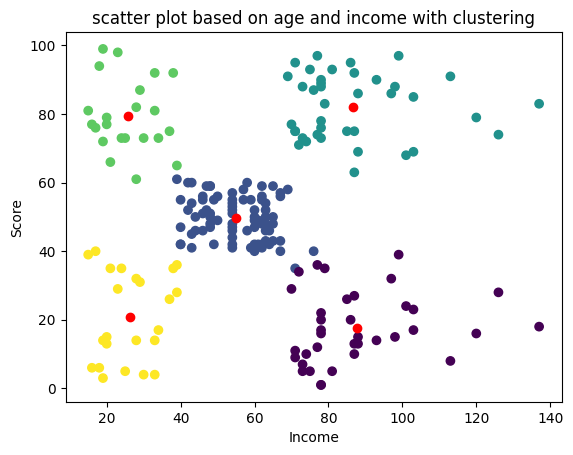

In [16]:
plt.scatter(data[:,0] , data[:,1] , c=yhat)
plt.scatter(center[:,0] , center[:,1] , color="red")
plt.xlabel("Income")
plt.ylabel("Score")
plt.title("scatter plot based on age and income with clustering")
plt.show()

In [17]:
df["labels_kmeans"] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_kmeans
0,1,0,19,15,39,4
1,2,0,21,15,81,3
2,3,1,20,16,6,4
3,4,1,23,16,77,3
4,5,1,31,17,40,4


In [18]:
df.groupby("labels_kmeans").mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
labels_kmeans,,,,,
0,163.500000,0.472222,40.666667,87.750000,17.583333
1,85.737500,0.587500,42.937500,55.087500,49.712500
2,162.000000,0.538462,32.692308,86.538462,82.128205
3,23.090909,0.590909,25.272727,25.727273,79.363636
4,23.000000,0.608696,45.217391,26.304348,20.913043


### DBSCAN

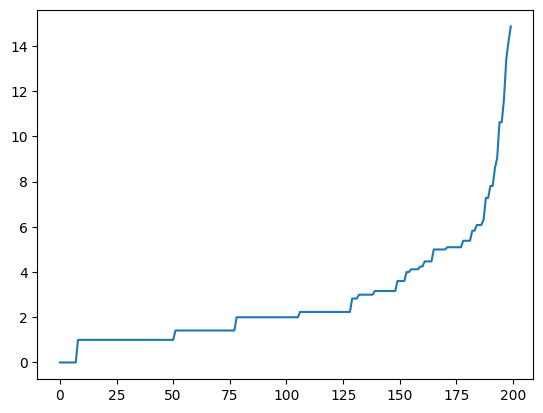

In [179]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data)
distances , indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [390]:
db = DBSCAN(eps=12 , min_samples=9)
db.fit(data)

DBSCAN(eps=12, min_samples=9)

In [391]:
db.fit_predict(data)

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  2,  2,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  2,  0,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [392]:
lables_db = db.fit_predict(data)
df["labels_db"] = lables_db
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_kmeans,labels_db
0,1,0,19,15,39,4,-1
1,2,0,21,15,81,3,0
2,3,1,20,16,6,4,1
3,4,1,23,16,77,3,0
4,5,1,31,17,40,4,-1


In [393]:
df["labels_db"].value_counts()

labels_db
 2    95
 3    31
-1    23
 4    23
 0    16
 1    12
Name: count, dtype: int64

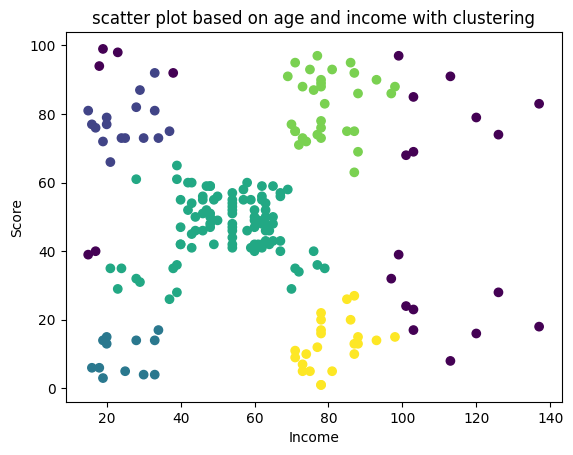

In [396]:
yhat1 = db.labels_
plt.scatter(x=data[:,0] , y=data[:,1] , c=yhat1)
plt.xlabel("Income")
plt.ylabel("Score")
plt.title("scatter plot based on age and income with clustering")
plt.show()

In [395]:
df.groupby("labels_db").mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels_kmeans
labels_db,,,,,,
-1,145.608696,0.652174,34.434783,88.304348,57.086957,1.565217
0,22.000000,0.562500,23.750000,25.062500,77.312500,3.000000
1,20.166667,0.583333,48.750000,24.583333,9.583333,4.000000
2,81.894737,0.600000,42.642105,53.157895,47.621053,1.284211
3,154.000000,0.548387,32.709677,79.774194,82.483871,2.000000
4,156.652174,0.304348,41.217391,80.956522,12.782609,0.000000
